Student name: Nicholas Murphy

Student ID: 21268819

## Objectives

In e-tivity 1, you practised performing exploratory data analysis (EDA) of a dataset without making changes to the dataset. Once you have a good understanding of the dataset, a next step in the data analytics process is to prepare this dataset for more elaborate analysis that typically involves machine learning algorithms. This preparation is also known as data preprocessing, or data munging, or data wrangling, and it typically involves:

* filling in/imputing missing values
* appropriately treating outliers/extreme values
* creating new features from the existing ones


At the end of this e-tivity you should be able to apply commonly used techniques for filling in missing values and treating outliers in a dataset. You should also be able to appreciate the usefulness of creating new features/attributes from the existing ones.

## Tasks

Open a new Jupyter notebook and name it etivity2.ipynb. In your notebook, load bank.csv into a Pandas dataframe. Follow the examples and process in Lab 2 - Data Preparation.ipynb to prepare bank.csv for machine learning.

Ensure that you have:

- filled in all missing values ✅ - encode age, job, education, contact and outcome on a case by case basis
- encoded all categorical attributes as numerical ✅ - replaced missing values on a case by case basis, and then converted to numerical?
- applied a scaler to rescale features ✅ - scalars applied to bring most columns into line - minmax and robust are the scalers used
- treated outliers appropriately ✅ - as duration and pdays were categorised and enumerated, only balance needed to be treated for outliers - used log tranform.
- created at least one new feature from the existing ones ✅ - added AgeGroup, is used to help fill in the missing education values.

Shortly describe and Justify the data preparation choices you have taken in markdown cells. Aim at not having markdown cells longer than 2-3 lines of text.

In the end, save the prepared dataset as a CSV file on your hard disk.

In [751]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
%matplotlib inline


In [752]:

df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

### First, lets check to see what gaps in the data we have

In [753]:
df.isna().sum() #detects missing values for an array like object


age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [754]:
# make a copy before we start munging with the data
df_original = df.copy()



## A - adding columns
### Add column to categorise pdays - number of days that passed by after the client was last contacted from a previous campaign

Justification - the actual number of days is less significant than the scale - 3 days vs 6 days doesn't tell us much, but recent vs long ago does.

In [755]:
bins= [-2,0,7,30, 90,180, np.inf]
labels = ['never','recently','thismonth','3month','6month','older' ]
df['pdays'] = pd.cut(df['pdays'], bins=bins, labels=labels)
df

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign   pdays  previous poutcome  \
0      cellular    1   apr       957         2  6month         2  failure   
1      cellular    1   apr       233         2  6month         1  failure   
2      cellular    1   apr       126         2   older         1  failure   
3      cellular    1   apr       274         1   older         2  failure   
4      cellular    1   apr       479         1   older         1  failure   
...         ...  ...   ...       ...       ...     ...       ...      ...   
1995   cellular   16   sep       327         2   never         0      NaN   
1996   cellular   16   sep      1334         2   never         0      NaN   
1997  telephone   17   sep       231         1   never         0      NaN   
1998        NaN   20   sep       185         1   never         0      NaN   
1999   cellular   22   sep       208         2   never         0      NaN   

     subscribed  
0            no  
1            no  
2            no  
3            no  
4            no  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[2000 rows x 17 columns]

### Add column to categorise duration

justification - as above - precise minute less important that general range of duration.

In [756]:
bins= [0,60, 300, 600,1200, np.inf]
labels = ['1 minute','5 minutes','10 minutes','20 minutes','>20 minutes' ]
df['duration'] = pd.cut(df['duration'], bins=bins, labels=labels)
df

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month     duration  campaign   pdays  previous poutcome  \
0      cellular    1   apr   20 minutes         2  6month         2  failure   
1      cellular    1   apr    5 minutes         2  6month         1  failure   
2      cellular    1   apr    5 minutes         2   older         1  failure   
3      cellular    1   apr    5 minutes         1   older         2  failure   
4      cellular    1   apr   10 minutes         1   older         1  failure   
...         ...  ...   ...          ...       ...     ...       ...      ...   
1995   cellular   16   sep   10 minutes         2   never         0      NaN   
1996   cellular   16   sep  >20 minutes         2   never         0      NaN   
1997  telephone   17   sep    5 minutes         1   never         0      NaN   
1998        NaN   20   sep    5 minutes         1   never         0      NaN   
1999   cellular   22   sep    5 minutes         2   never         0      NaN   

     subscribed  
0            no  
1            no  
2            no  
3            no  
4            no  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[2000 rows x 17 columns]

## B. Treatment of Missing Values in Numerical Columns

### Check for Missing Values

It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In this case, I'm imputing the age based on the education and job of the customer.

### Missing value : age

I'll use education and job to try and gauge the best age for those missing the value

In [757]:
ptable = df.pivot_table(values='age', # the columns we're care about
                        index='education',
                        columns='job',  # break down by
                        aggfunc=np.median)
ptable

job        admin.  blue-collar  entrepreneur  housemaid  management  retired  \
education                                                                      
primary      48.5         42.5          55.0       50.5        53.0     70.0   
secondary    40.0         37.0          42.5       48.5        39.0     63.0   
tertiary     33.0         29.0          43.5       32.0        37.0     68.0   

job        self-employed  services  student  technician  unemployed  
education                                                            
primary              NaN      47.0     22.0        49.0        39.0  
secondary           43.0      36.0     25.0        38.0        40.0  
tertiary            35.0      32.0     27.0        35.0        35.0

In [758]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['education'], x['job']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)


### Add column to categorise age

Justification - as there's not much difference between being 34 and 37, grouping ages into categories lets us deal with groups of years instead, which might have more statistical meaning.

In [759]:
bins= [0,20,30,40,50,60,70,150]
labels = ['0-20','30','40','50','60','70','80+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month     duration  campaign   pdays  previous poutcome  \
0      cellular    1   apr   20 minutes         2  6month         2  failure   
1      cellular    1   apr    5 minutes         2  6month         1  failure   
2      cellular    1   apr    5 minutes         2   older         1  failure   
3      cellular    1   apr    5 minutes         1   older         2  failure   
4      cellular    1   apr   10 minutes         1   older         1  failure   
...         ...  ...   ...          ...       ...     ...       ...      ...   
1995   cellular   16   sep   10 minutes         2   never         0      NaN   
1996   cellular   16   sep  >20 minutes         2   never         0      NaN   
1997  telephone   17   sep    5 minutes         1   never         0      NaN   
1998        NaN   20   sep    5 minutes         1   never         0      NaN   
1999   cellular   22   sep    5 minutes         2   never         0      NaN   

     subscribed AgeGroup  
0            no       40  
1            no       40  
2            no       60  
3            no       50  
4            no       60  
...         ...      ...  
1995        yes       30  
1996        yes       30  
1997        yes      80+  
1998        yes       50  
1999        yes       50  

[2000 rows x 18 columns]

### Missing value: education
find modal education level per age group

In [760]:
## Get the job mode by education
age_education_pivot = df.groupby('AgeGroup').apply(lambda x: x['education'].value_counts().idxmax())
print(age_education_pivot)


AgeGroup
0-20    secondary
30      secondary
40      secondary
50      secondary
60      secondary
70      secondary
80+       primary
dtype: object


In [761]:
def replace_missing_education(q):
        return age_education_pivot.loc[q['AgeGroup']]

# Replace missing values
df['education'].fillna(df[df['education'].isnull()].apply(replace_missing_education, axis=1), inplace=True)


### Missing value: job

Can't use a pivot table as I don't have a numeric value to work against. I'll find the modal value for the job column and replace gaps with that. 

In [762]:

education_job_pivot = df.groupby('education').apply(lambda x: x['job'].value_counts().idxmax())
education_job_pivot


def replace_missing_job(q):
        try:
                return education_job_pivot.loc[q['education']]
        except:
                print("arse")

# Replace missing values
df['job'].fillna(df[df['job'].isnull()].apply(replace_missing_job, axis=1), inplace=True)

### Missing value: contact

contact is has options of cellular or telephone. I'll go with the mode here too.

In [763]:
modal = df['contact'].mode()[0]
df['contact'] = df['contact'].fillna(modal)

### Missing value: poutcome

Theres a 1:1 correlation between previous = -1 and poutcome being blank. Assuming that implies that there was no outcome as they haven't been contacted, I'm setting poutcome to 'N/A', for not applicable in these cases.

In [764]:
df['poutcome'].fillna('N/A',inplace=True)

#### verify that all missing values have been accounted for

In [765]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
AgeGroup      0
dtype: int64

## C. Process and Encode the Categorical Features

In [766]:
def categorise_column(data_frame, column_name, mapper):
    data_frame[column_name].replace(mapper,inplace=True)


### set up the mappers I'll use for encoding features

In [767]:
job_mapper = {
    "technician":  1,
    "retired": 2,
    "blue-collar": 3, 
    "self-employed": 4,
    "services": 5,
    "management": 6,
    "admin.": 7,
    "unemployed" : 8,
    "student": 9,
    "entrepreneur": 10,
    "housemaid": 11
}

In [768]:
marital_mapper ={
    'single': 1, 
    'married' : 2,
    'divorced' : 3
}
education_mapper = {
    'primary': 1, 
    'secondary' : 2,
    'tertiary' : 3
}
yesno_mapper = {
    'yes':1, 
    'no' : 0
}
contact_mapper= {
    'cellular':1, 
    'telephone' : 2
}
poutcome_mapper= {
    'failure' : 0,
    'success':1, 
    'other': 2,
    'N/A':3
}
month_mapper = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12,
}


agegroup_mapper = {
    '0-20': 1,
    '30': 2,
    '40': 3,
    '50': 4,
    '60': 5,
    '70': 6,
    '80+': 7,
    'unknown': 8,
}

pdays_mapper = {
    'never': 0,
    'recently': 1,
    'thismonth': 2,
    '3month': 3,
    '6month': 4,
    'older': 5
}

duration_mapper = {
    '1 minute':1,
    '5 minutes':2,
    '10 minutes':3,
    '20 minutes':4,
    '>20 minutes':5
}


### convert the categoricals to numerical equivalents

In [769]:
categorise_column(df,'job',job_mapper)
categorise_column(df,'marital', marital_mapper)
categorise_column(df,'education', education_mapper)
categorise_column(df,'housing',yesno_mapper)
categorise_column(df,'loan',yesno_mapper)
categorise_column(df,'contact',contact_mapper)
categorise_column(df,'poutcome',poutcome_mapper)
categorise_column(df,'subscribed',yesno_mapper)
categorise_column(df,'default',yesno_mapper)
categorise_column(df,'month',month_mapper)
categorise_column(df,'AgeGroup',agegroup_mapper)
categorise_column(df,'pdays',pdays_mapper)
categorise_column(df,'duration',duration_mapper)


## C - encode cyclical values - day and month

justification - as day and month circle around, this can confuse a ML algorithm. I'll apply a cyclical transformation to each adding new columns

* Sin_day
* Cos_day
* Sin_month
* Cos_month

I'm unclear as to whether day and month should be removed. I've coded for it, but for now I'm commenting it out.

In [770]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

def cyclical_tranform_column(data_frame, column, period):
    data_frame["Sin_{column}".format(column=column)] = sin_transformer(period).fit_transform(data_frame)[column]
    data_frame["Cos_{column}".format(column=column)] = cos_transformer(period).fit_transform(data_frame)[column]
    #data_frame.drop(column, axis=1, inplace=True)



cyclical_tranform_column(df,'day',31)
cyclical_tranform_column(df,'month',12)

### verify that all columns are now numerical

In [771]:
df.dtypes

age           float64
job             int64
marital         int64
education       int64
default         int64
balance         int64
housing         int64
loan            int64
contact         int64
day             int64
month           int64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome        int64
subscribed      int64
AgeGroup        int64
Sin_day       float64
Cos_day       float64
Sin_month     float64
Cos_month     float64
dtype: object

## D. Rescaling Features

I think the intent is to get all values down to between 0 and 1. So how I'll scale values is:

* age - Robust Scaler - thanks Darren K for pointing out minmax's limitations.
* job - minmax
* education - minmax
* default - 1/0 already
* balance - robustScaler
* housing - 1/0 already
* loan - 1/0 already
* contact - minmax
* duration - minmax
* campaign - minmax
* pdays - minmax
* previous - minmax
* poutcome - minmax
* subscribed - minmax


In [788]:
minmax = MinMaxScaler()
def perform_minmax(data_frame, column):
    data_frame[column] = minmax.fit_transform(df[[column]])
    


In [773]:
#perform_minmax(df,'age')
perform_minmax(df,'job')
perform_minmax(df,'education')
perform_minmax(df,'contact')
perform_minmax(df,'duration')
perform_minmax(df,'campaign')
perform_minmax(df,'pdays')
perform_minmax(df,'previous')
perform_minmax(df,'poutcome')
perform_minmax(df,'subscribed')

### dealing with balance

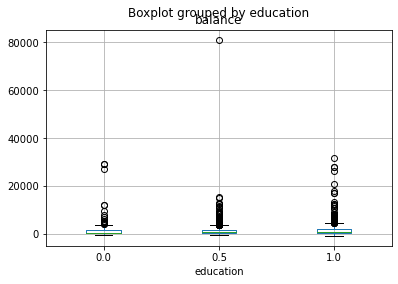

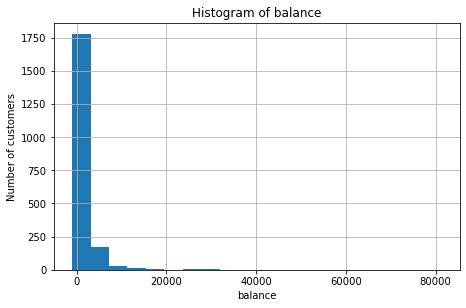

In [774]:
df.boxplot(column='balance', by='education')
plt.show()
# Create figure with two subplots
fig = plt.figure(figsize=(16,10))

# Plot balance
ax1 = fig.add_subplot(221)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of customers')
df['balance'].hist(bins=20)


plt.show()


As can be seen from the above boxplot, balance has a large outlier. Also the histogram is skewed severely to the left.
This is being dealt with by using RobustScalar, as it appears to be specifically designed to deal with outliers.


In [775]:

robust_scaler = RobustScaler()
df[['balance']] = robust_scaler.fit_transform(df[['balance']])


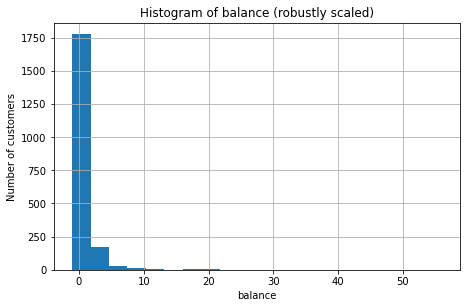

In [776]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,10))

# Plot balance
ax1 = fig.add_subplot(221)
ax1.set_title("Histogram of balance (robustly scaled)")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of customers')
df['balance'].hist(bins=20)


plt.show()

The robust scalar has brought the balance values down from huge values to more moderate ones. however, the graph is still very much skewed to the left.

In [777]:

# calculate the offset that will shift the balance values to be between 1 and infinity
offset = 1.01 - df[['balance']].min()[0]
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+offset)



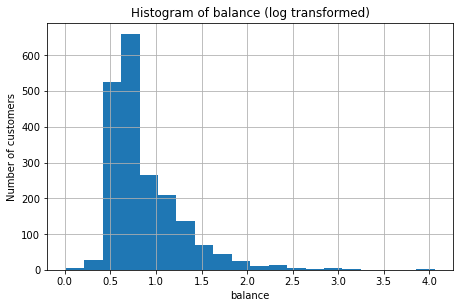

In [778]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,10))

# Plot balance
ax1 = fig.add_subplot(221)
ax1.set_title("Histogram of balance (log transformed)")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of customers')
df['balance'].hist(bins=20)


plt.show()

Having applied the log transform, the graph is looking much more like a normal distribution.

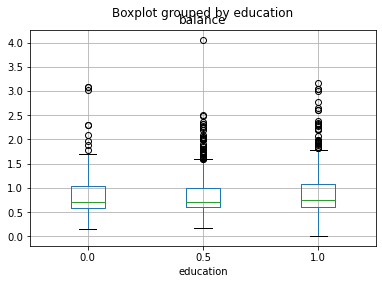

In [779]:
df.boxplot(column='balance', by='education')
plt.show()

### Age

As age could have outliers, minmax shouldn't be used to scale the value. I'll scale with robustScaler as has been done with balance.

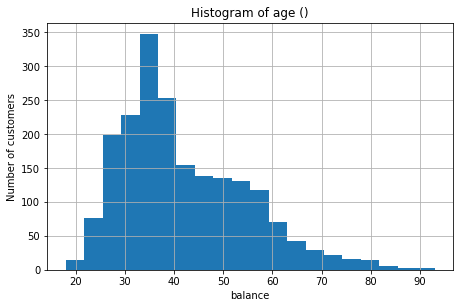

In [780]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,10))

# Plot balance
ax1 = fig.add_subplot(221)
ax1.set_title("Histogram of age ()")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of customers')
df['age'].hist(bins=20)


plt.show()

In [781]:
df[['age']] = robust_scaler.fit_transform(df[['age']])
offset = 1.01 - df[['age']].min()[0]
# Use a log transformation to decrease the impact of outliers
df['age'] = np.log(df['age']+offset)

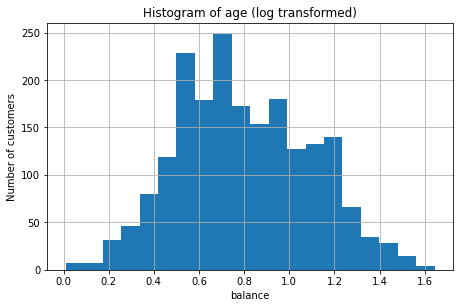

In [782]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,10))

# Plot balance
ax1 = fig.add_subplot(221)
ax1.set_title("Histogram of age (log transformed)")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of customers')
df['age'].hist(bins=20)


plt.show()

## F - statistics

Lastly, if we compare the stats from the original data to our updated dataframe, it clear that we've a better looking set of data.

* All of our columns are numeric, in comparison to the seven numeric one in the original dataframe
* the count is 2000 across the board, so we've no missing data.
* our value ranges, and thus our means, stddevs etc are all within a reasonable range of each other. This could be tightened up somewhat, as some categorisation enumerations I picked varied between starting at 0 and starting at 1.

In [783]:
df_original.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [784]:
df.describe()

age          job     marital    education      default  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean      0.802067     0.370700     1.77050     0.614750     0.007500   
std       0.291752     0.266622     0.62612     0.317029     0.086299   
min       0.009950     0.000000     1.00000     0.000000     0.000000   
25%       0.580973     0.100000     1.00000     0.500000     0.000000   
50%       0.751940     0.400000     2.00000     0.500000     0.000000   
75%       1.025245     0.500000     2.00000     1.000000     0.000000   
max       1.644161     1.000000     3.00000     1.000000     1.000000   

           balance      housing         loan      contact          day  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.868836     0.481500     0.125000     0.073000    13.851500   
std       0.401783     0.499783     0.330802     0.260202     9.712189   
min       0.009950     0.000000     0.000000     0.000000     1.000000   
25%       0.603649     0.000000     0.000000     0.000000     5.000000   
50%       0.728024     0.000000     0.000000     0.000000    12.000000   
75%       1.039846     1.000000     0.000000     0.000000    23.000000   
max       4.059815     1.000000     1.000000     1.000000    31.000000   

             month     duration     campaign        pdays     previous  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      5.002500     0.349875     0.090950     0.716600     0.046573   
std       3.079974     0.184589     0.137886     0.406506     0.061832   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.250000     0.000000     0.600000     0.018182   
50%       5.000000     0.250000     0.000000     1.000000     0.036364   
75%       7.000000     0.500000     0.100000     1.000000     0.054545   
max      12.000000     1.000000     1.000000     1.000000     1.000000   

          poutcome   subscribed     AgeGroup      Sin_day      Cos_day  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.350000     0.500000     3.706500     0.200956     0.185124   
std       0.402386     0.500125     1.274822     0.659767     0.700368   
min       0.000000     0.000000     1.000000    -0.998717    -0.994869   
25%       0.000000     0.000000     3.000000    -0.394356    -0.440394   
50%       0.333333     0.500000     3.000000     0.394356     0.347305   
75%       0.666667     1.000000     5.000000     0.848644     0.820763   
max       1.000000     1.000000     7.000000     0.998717     1.000000   

         Sin_month     Cos_month  
count  2000.000000  2.000000e+03  
mean      0.218295 -7.347338e-02  
std       0.685899  6.906266e-01  
min      -1.000000 -1.000000e+00  
25%      -0.500000 -8.660254e-01  
50%       0.500000 -1.836970e-16  
75%       0.866025  5.000000e-01  
max       1.000000  1.000000e+00

In [785]:
df.skew()

age            0.218107
job            0.176201
marital        0.213649
education     -0.232774
default       11.425264
balance        2.046214
housing        0.074106
loan           2.269489
contact        3.285356
day            0.403661
month          0.455357
duration       0.830190
campaign       2.320856
pdays         -1.068799
previous       5.461168
poutcome       0.679432
subscribed     0.000000
AgeGroup       0.693688
Sin_day       -0.362772
Cos_day       -0.449210
Sin_month     -0.637790
Cos_month      0.069918
dtype: float64

In [787]:
df.to_csv('munged.csv')

## Reflections

This was an interesting etivity. The steps to go through make sense - try and fill in gaps as intelligently as possible, convert text values into a numeric equivalent, and then scale and deal with outliers so that no one feature can be seen to dominate the dataset.

Still, there was a feeling around, so I'm not sure how much of a grasp I have on this, especially around the scaling/outlier aspect.

Should day and month be removed?
Is it okay to generalise the numeric data in a column, like in duration? It makes sense to me, but should that generalisation go into another column as another feature as opposed ot directly replacing the column.
